In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, noise=80, random_state=13)

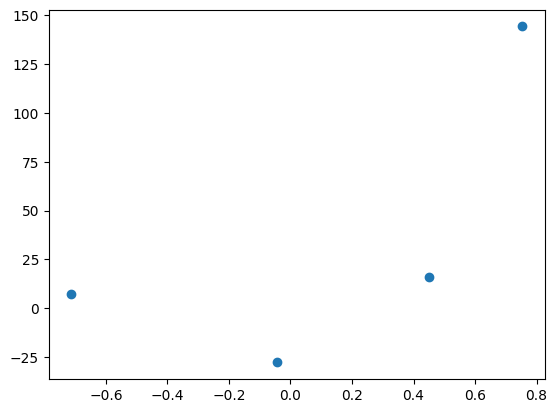

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [4]:
# first apply OLS
from sklearn.linear_model import LinearRegression

In [6]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [7]:
reg.coef_

array([78.35063668])

In [8]:
reg.intercept_

26.15963284313262

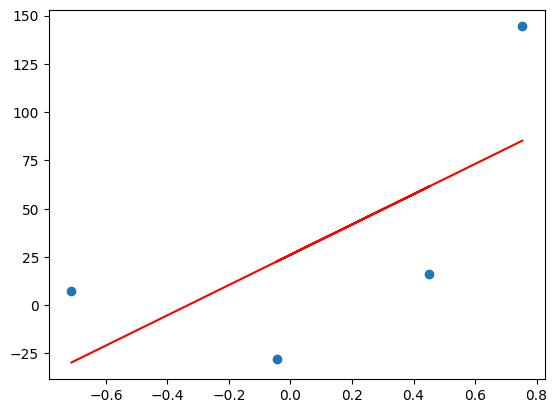

In [9]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='r')

In [29]:
# lets apply GD where slope is constant, m = 78.35
# and the starting value of intercept, b = 100
y_pred = ((78.35 * X) + 100).reshape(4)

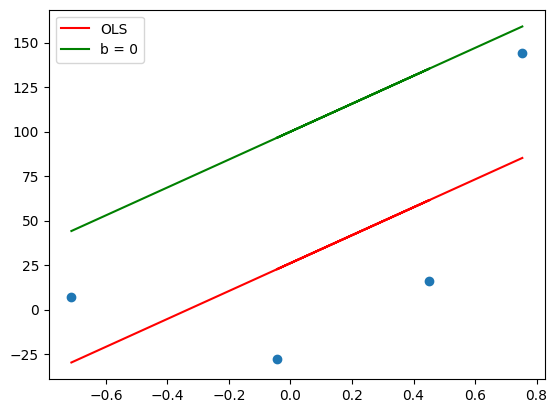

In [30]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='r', label='OLS')
plt.plot(X, y_pred, color='g', label='b = 0')
plt.legend()
plt.show()

In [31]:
m = 78.35
b = 100
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

590.7223659179078

In [32]:
# learning rate is 0.1
lr = 0.1
step_size = loss_slope * lr
step_size

59.072236591790784

In [33]:
# calculating new intercept i.e new b
b = b - step_size
b

40.927763408209216

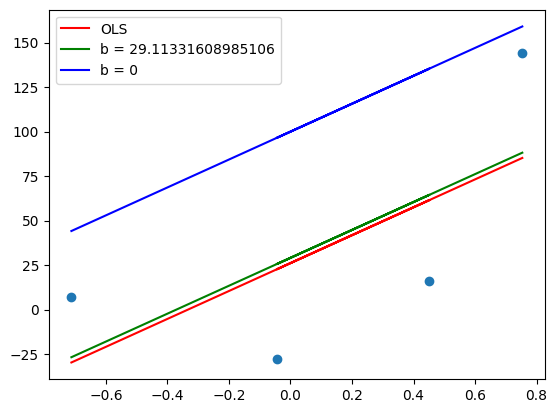

In [39]:
y_pred1 = ((78.35 * X) + b).reshape(4)
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='r', label='OLS')
plt.plot(X, y_pred1, color='g', label='b = {}'.format(b))
plt.plot(X, y_pred, color='b', label='b = 0')
plt.legend()
plt.show()

In [40]:
# iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

23.62889463671634

In [41]:
step_size = loss_slope * lr
step_size

2.362889463671634

In [42]:
b = b - step_size
b

26.750426626179426

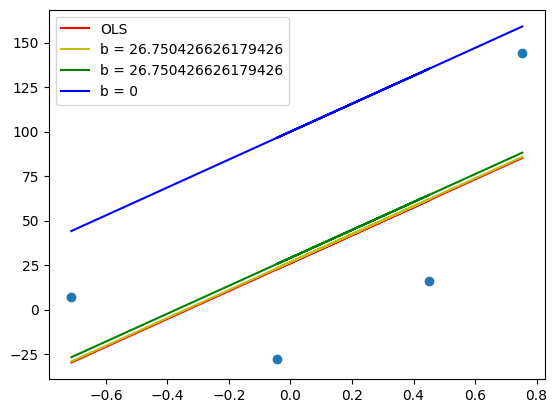

In [44]:
y_pred2 = ((78.35 * X) + b).reshape(4)
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='r', label='OLS')
plt.plot(X, y_pred2, color='y', label='b = {}'.format(b))
plt.plot(X, y_pred1, color='g', label='b = {}'.format(b))
plt.plot(X, y_pred, color='b', label='b = 0')
plt.legend()
plt.show()

In [45]:
# iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

4.725778927343242

In [46]:
step_size = loss_slope * lr
step_size

0.47257789273432427

In [47]:
b = b - step_size
b

26.2778487334451

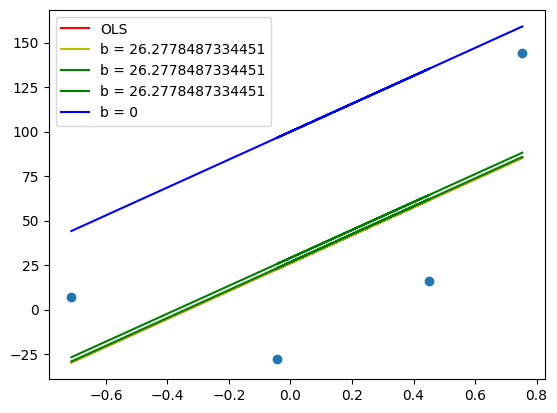

In [48]:
y_pred3 = ((78.35 * X) + b).reshape(4)
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='r', label='OLS')
plt.plot(X, y_pred3, color='y', label='b = {}'.format(b))
plt.plot(X, y_pred2, color='g', label='b = {}'.format(b))
plt.plot(X, y_pred1, color='g', label='b = {}'.format(b))
plt.plot(X, y_pred, color='b', label='b = 0')
plt.legend()
plt.show()

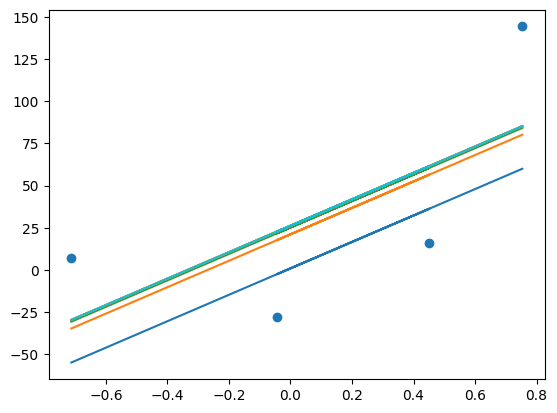

In [52]:
# using loop - epochs
b = -100
m = 78.35
lr = 0.1

epochs = 10

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    b = b - (loss_slope * lr)
    y_pred = m * X + b
    plt.plot(X,y_pred)

plt.scatter(X,y)

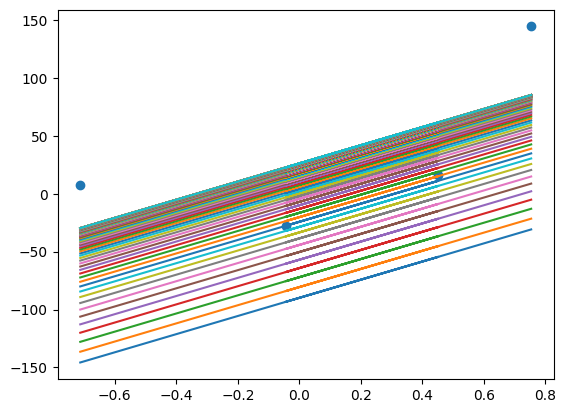

In [53]:
# lowest learning rate and max no of epochs
b = -100
m = 78.35
lr = 0.01#-------

epochs = 100#-------

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    b = b - (loss_slope * lr)
    y_pred = m * X + b
    plt.plot(X,y_pred)

plt.scatter(X,y)